## Example of Linear Regression

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - old new historic

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

f:(x) -> MEDV


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./housing.csv')

# convert all data in CRIM column to number
data['CRIM'] = pd.to_numeric(data['CRIM'], errors='coerce')

print(data['CRIM'].head(10))

data.fillna(0, inplace=True)

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
5    0.02985
6    0.08829
7    0.14455
8    0.21124
9    0.17004
Name: CRIM, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

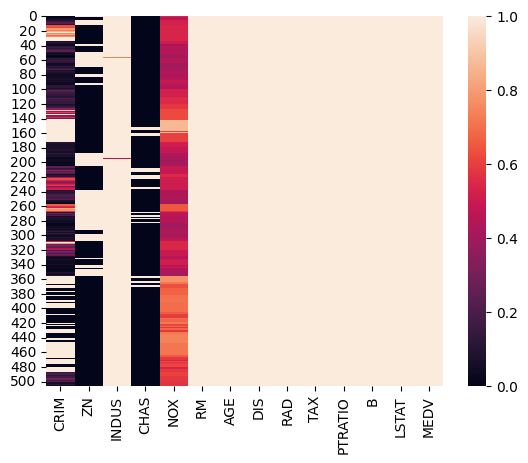

In [5]:
sns.heatmap(data, vmin=0, vmax=1)

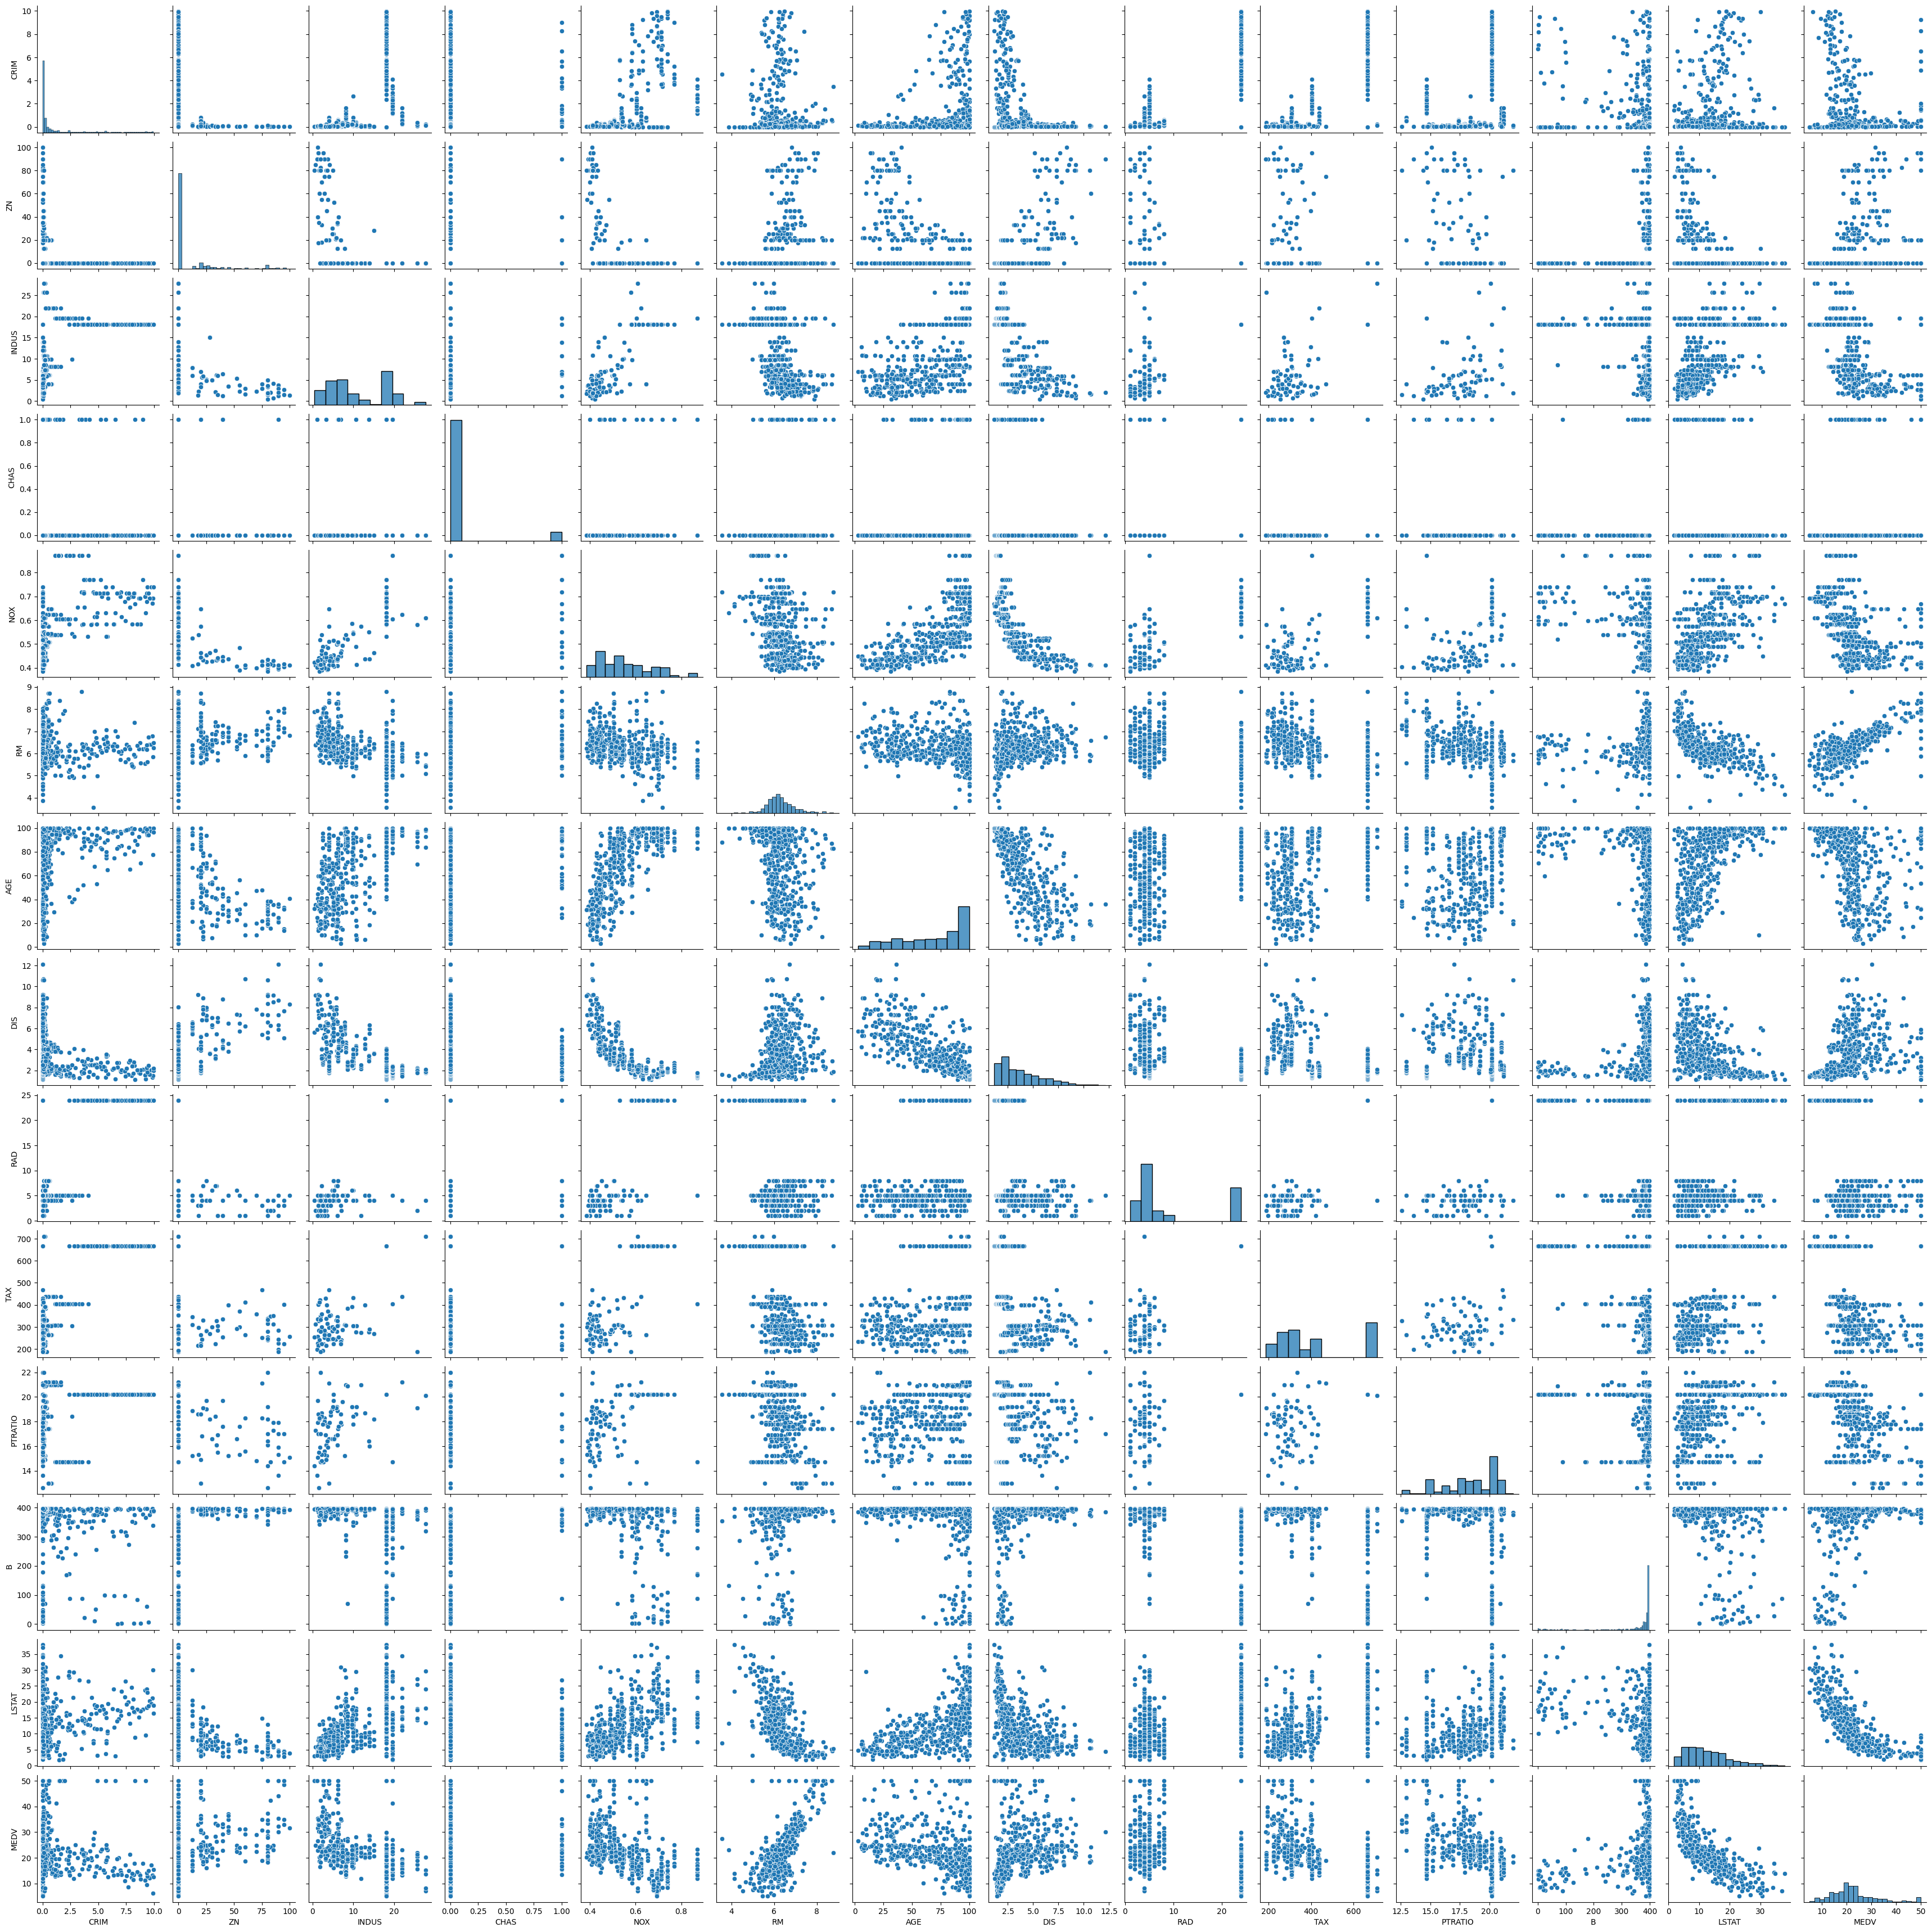

In [6]:
sns.pairplot(data)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
y = data['MEDV']
x = data.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

# X_train -> Y_train (learning it) 
# model -> x_test -> predicted values -> predicted & y_test

In [9]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93


In [11]:
y_train.head()

141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
Name: MEDV, dtype: float64

In [10]:
y_train.head()

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
Name: MEDV, dtype: float64

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
predicted_values = lr.predict(X_test)

In [15]:
print(y_test.values)

[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8 26.7 21.7 22.  22.9 10.4 21.9 20.6 26.4 41.3 17.2
 27.1 20.4 16.5 24.4  8.4 23.   9.7 50.  30.5 12.3 19.4 21.2 20.3 18.8
 33.4 18.5 19.6 33.2 13.1  7.5 13.6 17.4  8.4 35.4 24.  13.4 26.2  7.2
 13.1 24.5 37.2 25.  24.1 16.6 32.9 36.2 11.   7.2 22.8 28.7]


Text(0, 0.5, 'Predictions')

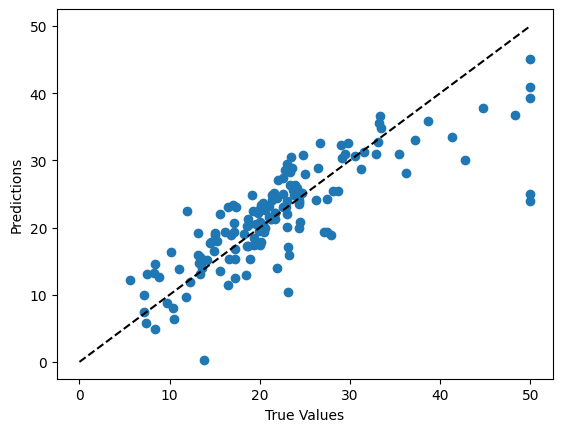

In [18]:
# plot the prediction
plt.scatter(y_test.values, lr.predict(X_test))
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [21]:
#  check the error between the true values and the predicted values
msqe = mean_squared_error( y_test.values, predicted_values)

In [22]:
print(msqe) 

27.360782304555823


In [24]:
lr.predict([[0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]])

/Users/joe_codes/dev/open-source/Mentorship/TMP2025/ai-ml-2025/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.57713181])

In [ ]:
24.00